# Lab 3: Clustering and Manifold Learning

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [63]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [64]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [66]:
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

In [67]:
df.shape

(614, 16)

In [68]:
df['Loan_Status_Y'].value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

The dataset contains only numerical attributes.Also the data is prepared, hence no need to scale

## Task 2

1- Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 

2- Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. 

3- Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.

4- Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [69]:
colors = np.array(['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title, ax):
    
    #plt.figure(figsize=(12,6))
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = ax.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))


    # plot the centers of the clusters
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = ax.set_title(title)
    _ = ax.legend()
    _ = ax.set_xlabel('x')
    _ = ax.set_ylabel('y')

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### 1-  Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 


A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine the optimal value of $k$.

I will apply the given method using the $k$-Means clustering technique using the  using the Sklearn library of python. I will run $k$-means clustering on the given dataset for a range of values of $k$ (num_clusters, e.g $k$=2 to 6), then will calcualte the Sum of Squred Mean Errors for each value of $k$ in the given range.

Afterwards I will plot SSE for each value of $k$. The graph is expected form an arm shape with **elbow**. The **elbow** on the arm is the value of optimal k = number of cluster. The optimal $k$ value is when SSE increases before it starts to drop again.SSE is expected to decrease toward 0 as $k$ increases (and SSE is 0 when $k$ is equal to the number of data points in the dataset. That is each data point is its own cluster,hence is no error between it and the center of its cluster.

The generated values and graph will vary for each run.

Calculate the sum of sqaured distance

In [71]:
sum_sqr_dis = []

# cluster range
K= range(2,6) 
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init='k-means++',n_init=1,max_iter=300).fit(data) 
    sum_sqr_dis.append(kmeans.inertia_)
 

Store clusters and centers into a dataframe

In [72]:
centers_df = pd.DataFrame({'Clusters':K,'Centers':sum_sqr_dis})
centers_df

Clusters     Centers
0         2  873.221164
1         3  778.980874
2         4  722.707162
3         5  663.695673

plot sun squared error vs number of clusters

### 2- Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. 


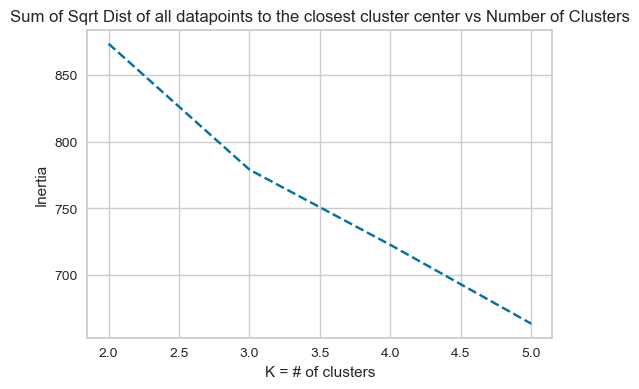

In [108]:
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(K,sum_sqr_dis,'x--')
plt.xlabel("K = # of clusters")
plt.ylabel("Inertia")
plt.title("Sum of Sqrt Dist of all datapoints to the closest cluster center vs Number of Clusters")
plt.show()

**Conclusion:** The elbow forms at **$k$ = 3.**

### Use the Silhoutte method to cross compare with Elbow

Silhoutte is another method we can use to determine the optimal value for k is Silhouette Coefficient and cross validate with our findings from the elbow method. The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. by providing a succinct graphical representation of how well each object has been classified.The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a datapoint-pont and all other points in the same class.

b: The mean distance between a datapoint and all other points in the next nearest cluster.

In [141]:
import sklearn.metrics as metrics

In [142]:
sil_score = []

K = range(2,6)
for k in K:
    labels = cluster.KMeans(n_clusters=k,init='k-means++',n_init=1, max_iter=300).fit(data).labels_
    ss = metrics.silhouette_score(data,labels,metric='euclidean')
    sil_score.append(ss)
    
ss_df = pd.DataFrame({'Clusters':K,'Silhouette Score':sil_score})
ss_df

Clusters  Silhouette Score
0         2          0.186111
1         3          0.188246
2         4          0.176635
3         5          0.191069

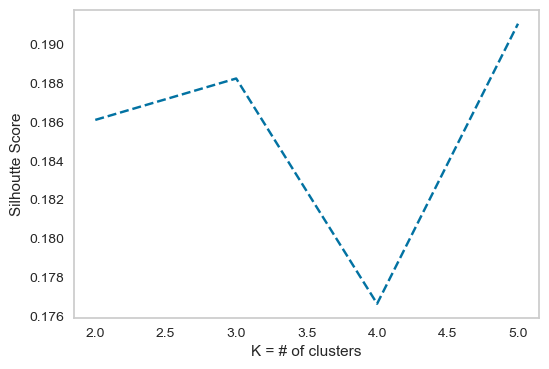

In [143]:
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(K,sil_score,'x--')
plt.xlabel("K = # of clusters")
plt.ylabel("Silhoutte Score")
plt.show()

### 3- Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.


#### Run k-Means


In [156]:
k_opt = 4 # k optimal
clustered_data_sklearn = cluster.KMeans(n_clusters=k_opt,init = 'k-means++',n_init=1, max_iter=300).fit(data)

#### Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [157]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [158]:
MDS_XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [163]:
TSNE_XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


In [164]:
SE_XYcoordinates = manifold.SpectralEmbedding(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Multidimensional `MDS` scaling aims to preserve the distances between pairs of data points, focusing on pairs of distant points in the original space. Differently, `t-SNE` focuses on maintaining neighborhood data points. Data points that are close in the original data space will be tight in the t-SNE embeddings.  Similar to `T-SNE`,the graph generated by `SpectralEmbedding` can be considered as a discrete approximation of the low dimensional manifold in the high dimensional space. Minimization of a cost function based on the graph ensures that points close to each other on the manifold are mapped close to each other in the low dimensional space, preserving local distances

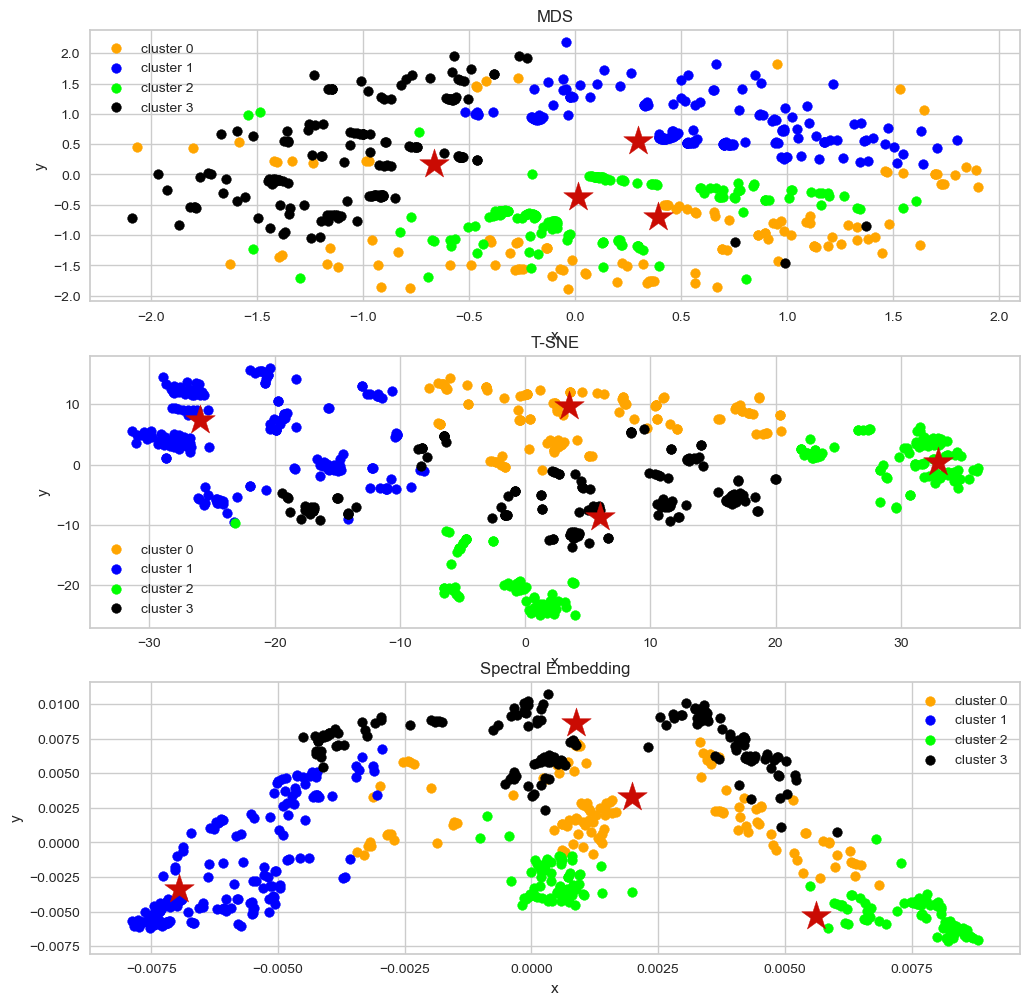

In [165]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,12))

    
clustering_scatterplot(points=MDS_XYcoordinates[:-k,:], 
                   labels=clustered_data_sklearn.labels_, 
                   centers=MDS_XYcoordinates[-k:,:], 
                   title='MDS', ax = ax1)

clustering_scatterplot(points=TSNE_XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=TSNE_XYcoordinates[-k:,:], 
                       title='T-SNE', ax = ax2)

clustering_scatterplot(points=SE_XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=SE_XYcoordinates[-k:,:], 
                       title='Spectral Embedding', ax = ax3)
    


(4,)


Text(0.5, 0, 'Cluster')

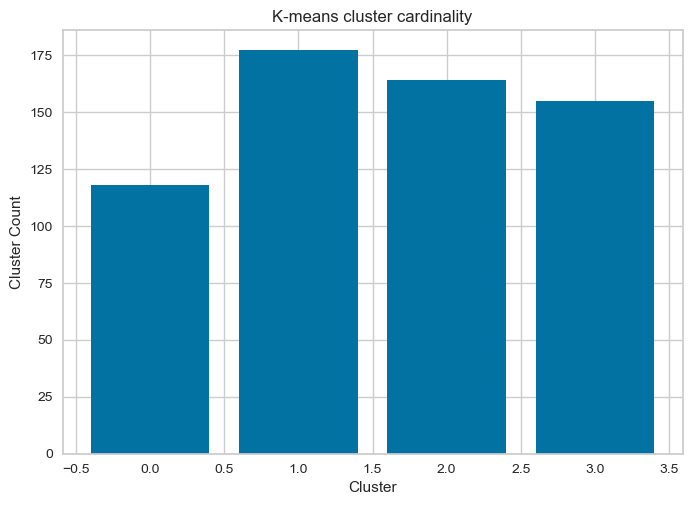

In [167]:
kmeans_cluster_count = np.bincount(clustered_data_sklearn.labels_)
print(kmeans_cluster_count.shape)
plt.bar(range(0,len(kmeans_cluster_count)), kmeans_cluster_count)
plt.title('K-means cluster cardinality')
plt.ylabel('Cluster Count')
plt.xlabel('Cluster')

In [168]:
df['cluster'] = pd.Series(kmeans.labels_, index=df.index)

In [169]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.113208         0.786753    0.927333          0.750000   
1          0.304569         0.917884    1.108176          0.717893   
2          0.114478         0.904834    1.025484          0.720455   
3          0.274775         0.928665    1.069151          0.688007   
4          0.293447         0.967890    1.141742          0.715171   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.867925     0.000000    0.037736     0.113208     0.000000   
1              0.984772     0.979695    0.010152     0.873096     0.000000   
2              0.919192     0.414141    0.040404     0.212121     0.020202   
3              0.993243     0.972973    0.013514     0.750000     0.006757   
4              0.401709     0.948718    0.025641     0.752137     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.075472           0.056604                0.150943   
1                 0.157360           0.040609                0.213198   
2                 0.151515           0.070707                0.202020   
3                 0.108108           0.067568                0.175676   
4                 0.136752           0.034188                0.324786   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.000000             0.584906       0.547170   
1                       0.507614             0.000000       1.000000   
2                       1.000000             0.000000       0.797980   
3                       0.000000             1.000000       0.783784   
4                       0.290598             0.196581       0.008547   

         TotalIncome  
cluster               
0           0.660625  
1           0.898881  
2           0.796356  
3           0.876587  
4           0.931815

#### Cluster Analysis:


Cluster 0 has the lowest `ApplicantIncome` , `LoanAmount`, `Education_Not Graduate` and 0 located in urban areas `Property_Area_Urban` with high  `Credit_History`. 
Cluster 1 has the lowest `Loan_Status_Y` which means, they get the highest rejections. Also applican income is the 2nd lowest
Cluster 2 has the highest `ApplicantIncome` , `LoanAmount` , `Self_Employed_Yes` with the 2nd highest `Credit_History`. 0 located in urban areas `Property_Area_Urban`.The results yeilds towards that cluster 2 seems to be an older age as they have the 2nd lowest number of dependand and highest marriage status. Could be retired or newly wed. 
Cluster 3 the highest `Credit_History` and tend to not be granted a loan compared to other clusters. We can also see that they haven't graduated as much as the others have, this cluster could be those in blue collar jobs for example.
Cluster 4 is the representation of `Managers` category and `entreprneurs`. highest income , highest `LoanAmount`, but lowest credit history


### 4- Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [188]:
from yellowbrick.cluster import SilhouetteVisualizer

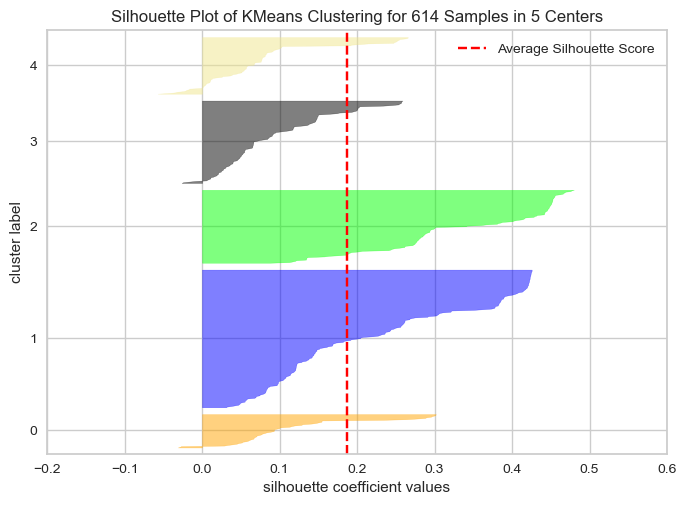

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 614 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [189]:
sil_visualizer = SilhouetteVisualizer(cluster.KMeans(n_clusters=k,init = 'k-means++',n_init=1, max_iter=300),colors=['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])
sil_visualizer.fit(data)    
sil_visualizer.show()

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


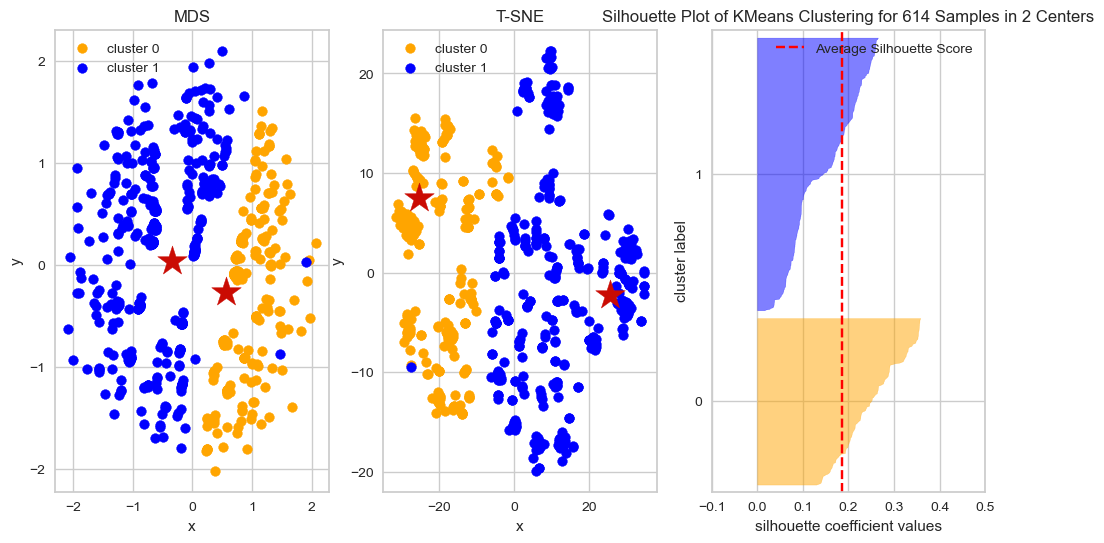

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


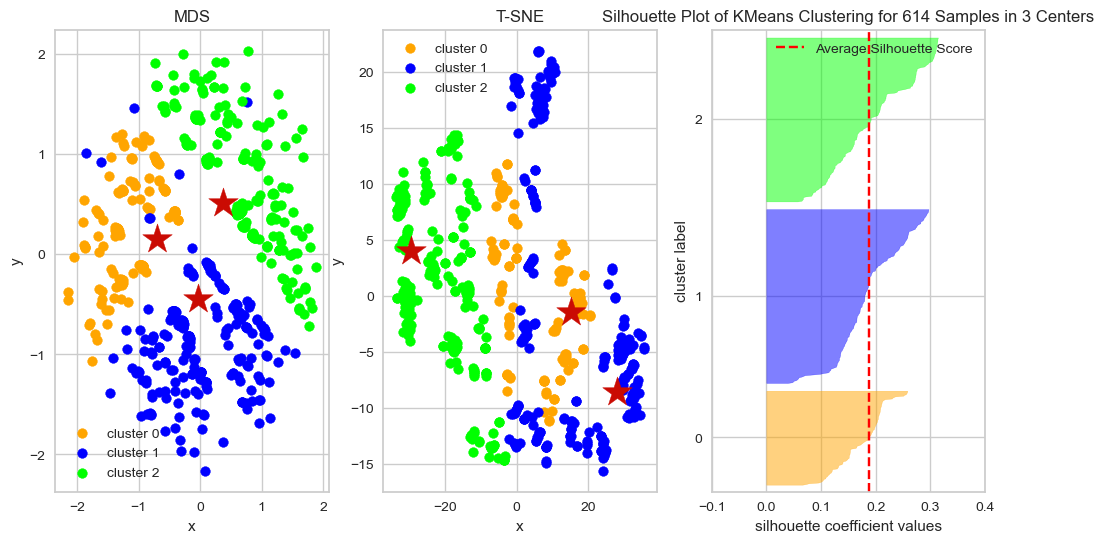

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


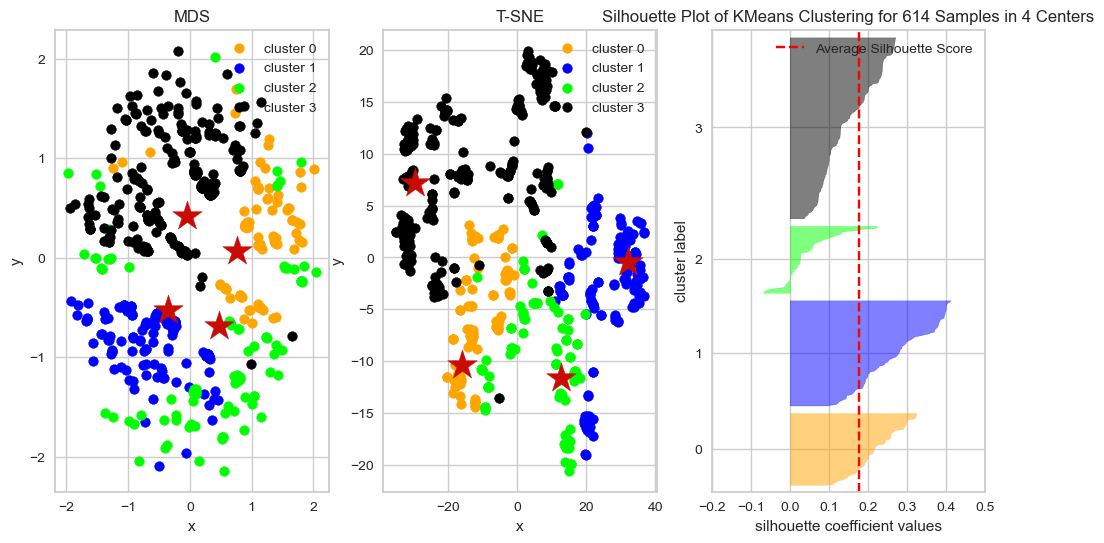

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


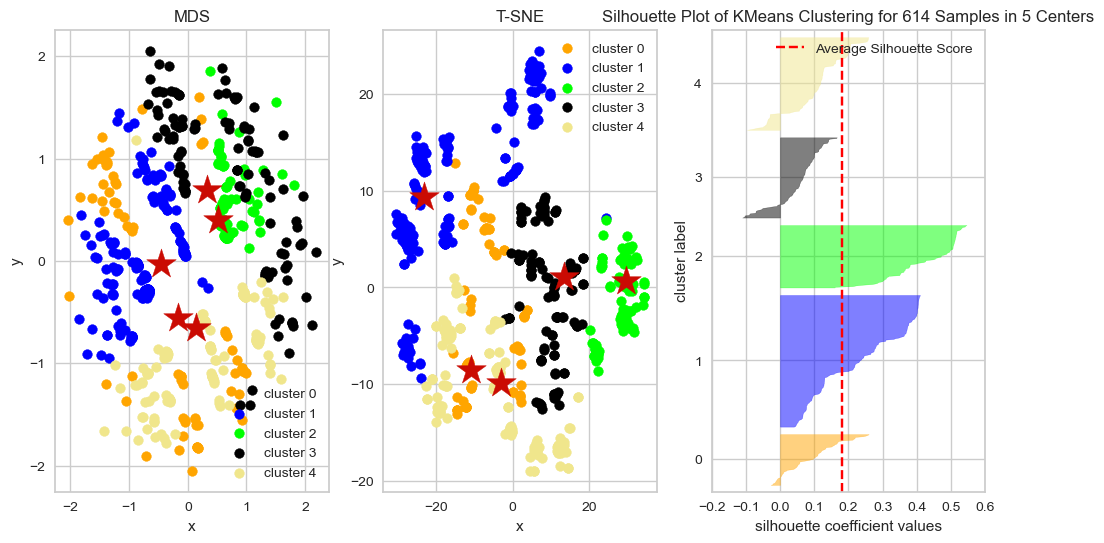

In [190]:
K = range(2,6)


for k in K:
    
    clustered_data_sklearn = cluster.KMeans(n_clusters=k,init = 'k-means++',n_init=1, max_iter=300).fit(data)
    data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12, 6))
    
    MDS_XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")
    clustering_scatterplot(points=MDS_XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=MDS_XYcoordinates[-k:,:], 
                       title='MDS', ax = ax1)
    
    TSNE_XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")
    clustering_scatterplot(points=TSNE_XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=TSNE_XYcoordinates[-k:,:], 
                           title='T-SNE',ax = ax2)
   
    sil_visualizer = SilhouetteVisualizer(clustered_data_sklearn,ax=ax3,colors=['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])
    sil_visualizer.fit(data)
    sil_visualizer.show()

        

## Task 3

1- Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.
2- Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

In [191]:
from sklearn.cluster import AffinityPropagation
affin = AffinityPropagation(damping=0.9, preference=-200, affinity='euclidean', random_state=None)
# fit the model
affin.fit(data)

AffinityPropagation(damping=0.9, preference=-200)

In [192]:
n_clusters_affin = len(affin.cluster_centers_indices_)


In [193]:
data_and_centers_affin = np.r_[data,affin.cluster_centers_]

In [194]:
affin_XYcoordinates_tsne = manifold.TSNE(n_components=2).fit_transform(data_and_centers_affin)
print("transformation complete")

transformation complete


In [195]:
affin_XYcoordinates_se = manifold.SpectralEmbedding(n_components=2).fit_transform(data_and_centers_affin)
print("transformation complete")

transformation complete


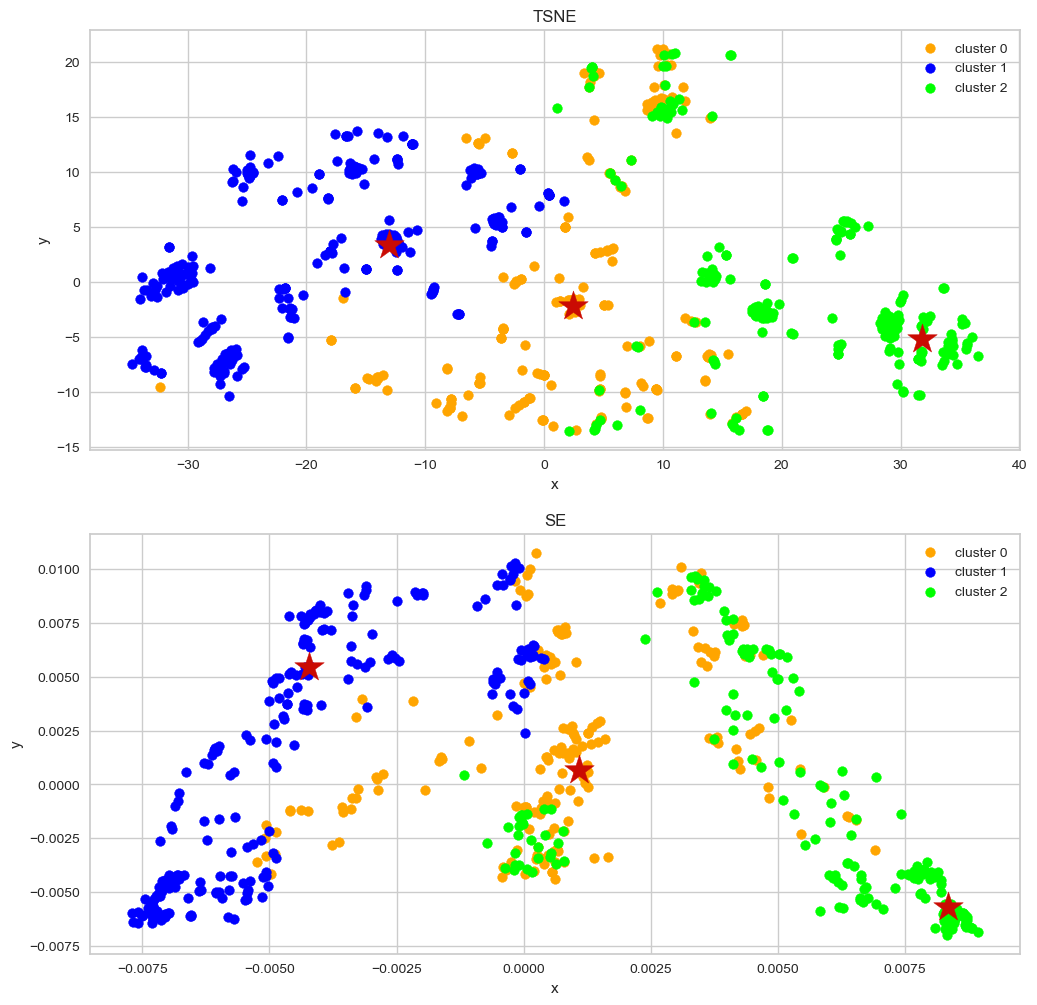

In [196]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12))

clustering_scatterplot(points=affin_XYcoordinates_tsne[:-n_clusters_affin,:], 
                       labels=affin.labels_,
                       centers=affin_XYcoordinates_tsne[-n_clusters_affin:,:], 
                       title='TSNE', ax = ax1)

clustering_scatterplot(points=affin_XYcoordinates_se[:-n_clusters_affin,:], 
                       labels=affin.labels_,
                       centers=affin_XYcoordinates_se[-n_clusters_affin:,:], 
                       title='SE', ax = ax2)

SE seems to provide better seperation vs T-SNE

Text(0.5, 0, 'Cluster')

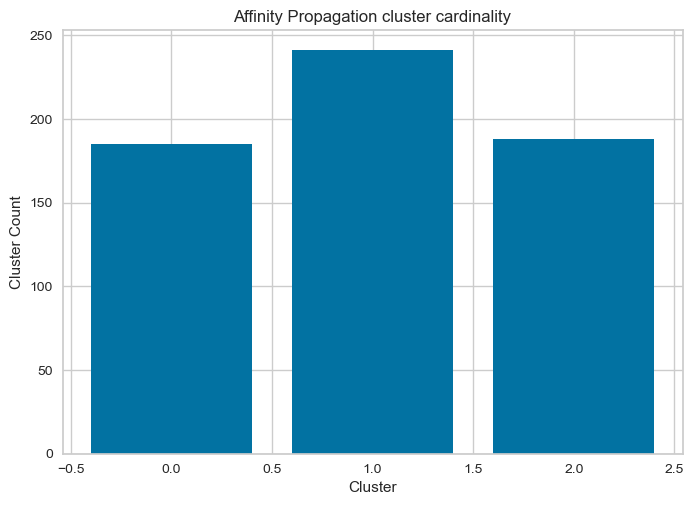

In [197]:
affin_cluster_count = np.bincount(affin.labels_)
plt.bar(range(0,len(affin_cluster_count)), affin_cluster_count)
plt.title('Affinity Propagation cluster cardinality')
plt.ylabel('Cluster Count')
plt.xlabel('Cluster')

In Affinity Propagation, each data point sends messages to all other points informing its targets of each target’s relative attractiveness to the sender. Each target then responds to all senders with a reply informing each sender of its availability to associate with the sender, given the attractiveness of the messages that it has received from all other senders. Senders reply to the targets with messages informing each target of the target’s revised relative attractiveness to the sender, given the availability messages it has received from all targets. The message-passing procedure proceeds until a consensus is reached. Once the sender is associated with one of its targets, that target becomes the point’s exemplar. All points with the same exemplar are placed in the same cluster.The class takes several parameter, the lower the `preference` , the higher the number of clusters. leaving it to defauly will set it to the median value and results in many clusters, which is impractical.The damping factor which damps the responsibility and availability of the messages to avoid numerical oscillations when updating these messages.I tried several paramters values. the `damping should be between 0.5 to 0.1`, I chose 0.9 to achoeve meaningful clustering with clear seperation.Overall we can see some clear groupings and less overlapping than we did in K-means.

Unlike K-means. Affinity Propogation does not require to specify the number of cluster ahead or iterate over the k values to allocate the point to the nearest cluster, but it auto generates it. The key is to properly fine tune the paramter not to end up with huge number of clusters. This also helps to have faster execution and but does not scale for large number of samples.

In [198]:
df['cluster'] = pd.Series(affin.labels_, index=df.index)

In [181]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.288288         0.934189    1.052699          0.712703   
1          0.197787         0.901705    1.052912          0.728008   
2          0.273050         0.918348    1.129252          0.695213   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.648649     0.854054    0.027027     0.735135     0.000000   
1              0.937759     0.709544    0.016598     0.502075     0.008299   
2              0.952128     0.851064    0.021277     0.750000     0.005319   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.140541           0.048649                0.308108   
1                 0.132780           0.041494                0.199170   
2                 0.127660           0.069149                0.154255   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.162162             0.243243       0.221622   
1                       0.842324             0.000000       0.900415   
2                       0.000000             0.835106       0.872340   

         TotalIncome  
cluster               
0           0.851069  
1           0.822920  
2           0.925093

The applicant income in the 3 clusters are fairly close. But for cluster 0 it seems that the majority fall yner self employed , and have the less education, but have higher number of dependents have less loan status yes. which means lower approval rates despite of having the higest Applicant income, but medium total income. They also fall in Gender male category. However the results makes sense becayse they have high married_yes values which is inline with high nymber of dependents. Also they are self-employed, which means most likely to be in blue-coller category. 

Cluster 1 has the highest loan_yes , which mid applicant income, but mid-value of graduates_not. which means they are likely to fall in the majority of the catogories, lowest marriage and dependant rate.

Cluster 2 has the 2nd highest loan_yes , 2nd highest applicant income, highest total incime, but low-value of graduates_not. which means they are likely to fall in the Management and other educated catogories.


Conclusion, the aggresively low value of preference likely caused this low clustering. 3 clusters are most likely not optimal.


### STOP reading here, the rest was for experimnting

In [182]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(data)
agc


AgglomerativeClustering(compute_distances=True, n_clusters=3)

In [183]:
#AgglomerativeClustering(compute_distances=True, n_clusters=3)

In [184]:
agc_lables = agc.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Euclidean distance')

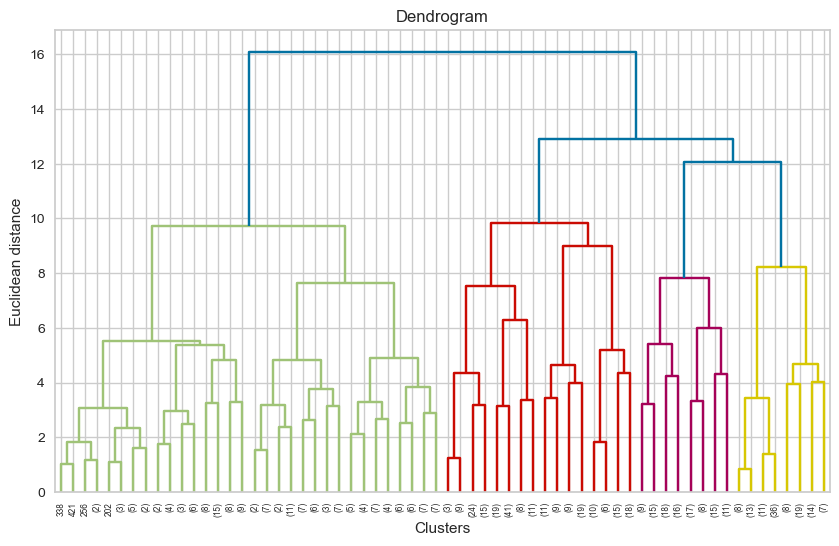

In [185]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'), truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.legend()
plt.ylabel('Euclidean distance')

In [186]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit(data)
# clustering.labels_
# >>> clustering
# SpectralClustering(assign_labels='discretize', n_clusters=2,
#     random_state=0)
# clustering

transformation complete
transformation complete
transformation complete
transformation complete


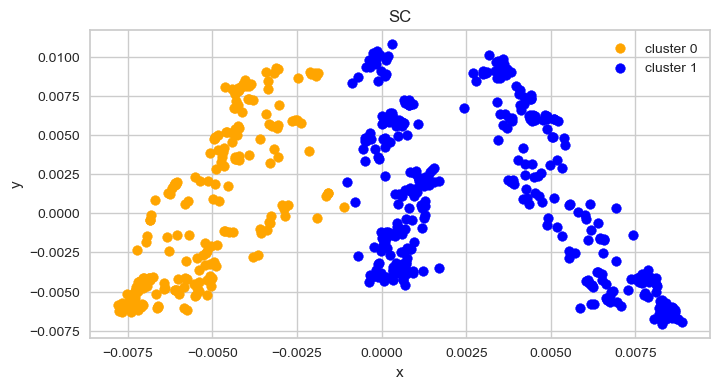

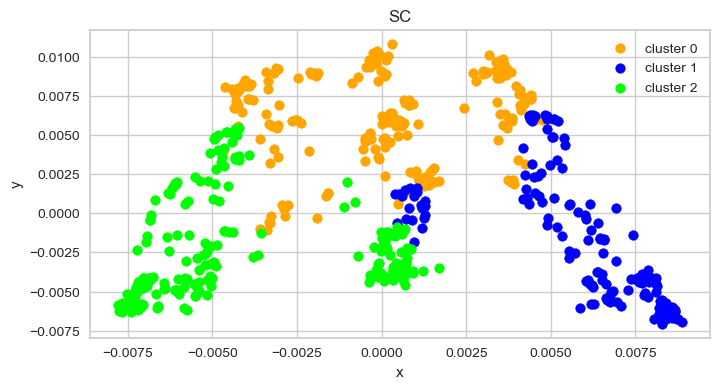

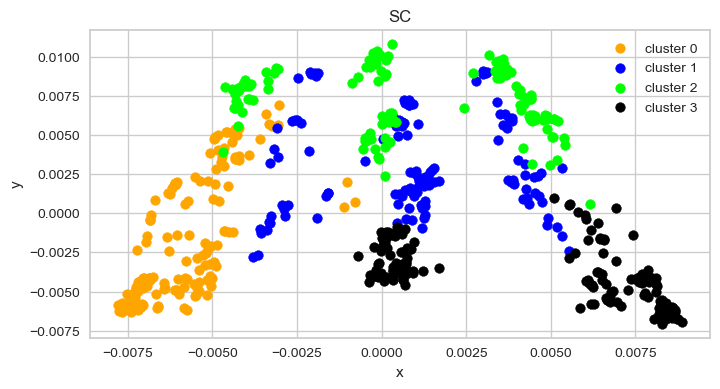

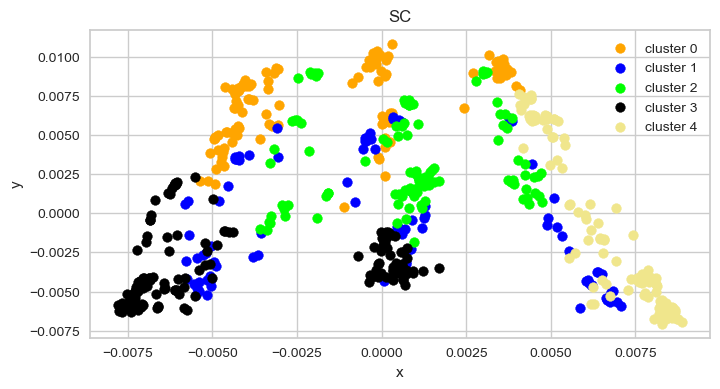

In [187]:
# data_and_centers = np.r_[data,clustering.cluster_centers_]

K = range(2,6)

for k in K:
    fig, (ax4) = plt.subplots(figsize=(8, 4))
    
    clustering = SpectralClustering(n_clusters=k,assign_labels='discretize',random_state=0).fit(data)
    #clustering = SpectralClustering(n_clusters=k,random_state=0).fit(data)

    clustering.labels_
    #data_and_centers_af = np.r_[data,af.cluster_centers_]


    SC_XYcoordinates = manifold.SpectralEmbedding(n_components=2).fit_transform(data)
    print("transformation complete")
    clustering_scatterplot(points=SC_XYcoordinates, 
                       labels=clustering.labels_, 
                       centers=None, 
                       title='SC', ax = ax4)

# colors = np.array(['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])

# # sc = SpectralClustering(n_clusters=4).fit(data)
# # print(sc)
 
# # labels = sc.labels_

# # SC_XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data)

# # plt.scatter(data[:,0], data[:,1], c=labels)
# # plt.show()

# f = plt.figure()
# f.add_subplot(2, 2, 1)
# for i in range(2, 6):
#     sc = SpectralClustering(n_clusters=i).fit(data)
#     f.add_subplot(2, 2, i-1)
#     plt.scatter(data[:,0], data[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
#     plt.legend()

# plt.show() 